# Лабораторная работа 4. Недообучение и эффект "катастрофического забывания"

In [3]:
import torch
from torch import nn

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

Сгенерируйте данные для первого задания:

In [4]:
# Генерация данных
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

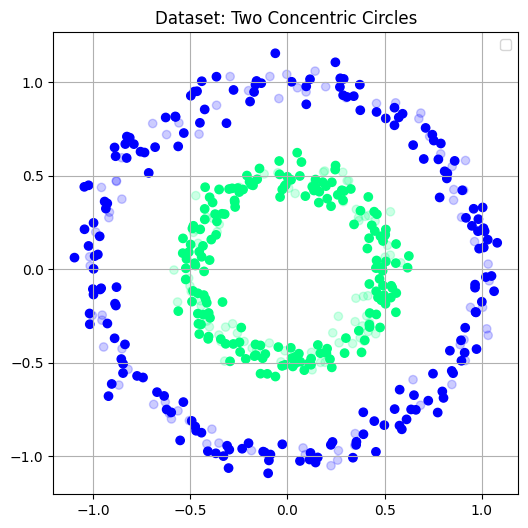

In [5]:
# Визуализация данных
plt.figure(figsize=(6,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="winter", alpha=1.0)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="winter", alpha=0.2)
plt.title("Dataset: Two Concentric Circles")
plt.legend()
plt.grid(True)

### Задание 1.1
Обучите на `100` эпохах **линейную** модель нейронной сети, заданную классом `LinearModel`, задаче классификации точек сгенерированного датасета. Используйте оптимизатор `optim.Adam` с `lr=0.01` и функцию потерь `nn.BCELoss()`. В процессе обучения постройте графики значений функции потерь на обучающей и валидационной подвыборках.

In [6]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

Epoch 10/100, Train Loss: 0.6940, Val Loss: 0.6933
Epoch 20/100, Train Loss: 0.6932, Val Loss: 0.6940
Epoch 30/100, Train Loss: 0.6931, Val Loss: 0.6948
Epoch 40/100, Train Loss: 0.6930, Val Loss: 0.6944
Epoch 50/100, Train Loss: 0.6930, Val Loss: 0.6942
Epoch 60/100, Train Loss: 0.6930, Val Loss: 0.6942
Epoch 70/100, Train Loss: 0.6930, Val Loss: 0.6942
Epoch 80/100, Train Loss: 0.6930, Val Loss: 0.6943
Epoch 90/100, Train Loss: 0.6930, Val Loss: 0.6943
Epoch 100/100, Train Loss: 0.6930, Val Loss: 0.6943


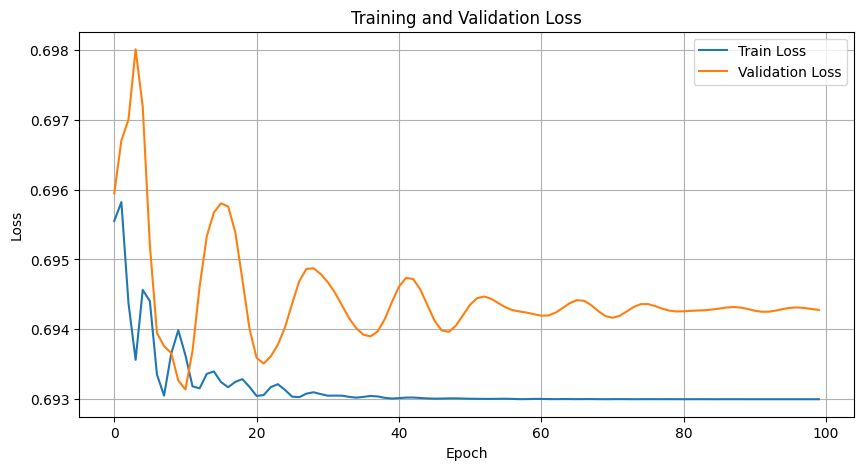

In [7]:
import torch.optim as optim

# Инициализация модели, функции потерь и оптимизатора
model = LinearModel()
fn_loss = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Обучение модели
train_losses = []
val_losses = []
epochs = 100

for epoch in range(epochs):
    # Обучение
    model.train()
    optimizer.zero_grad()
    train_predict = model(X_train)
    train_loss = fn_loss(train_predict, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())
    
    # Валидация
    model.eval()
    with torch.no_grad():
        val_predict = model(X_test)
        val_loss = fn_loss(val_predict, y_test)
        val_losses.append(val_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Построение графиков
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

### Задание 1.2
Обучите на `100` эпохах **НЕлинейную** модель нейронной сети, заданную классом `NonLinearModel`, задаче классификации точек сгенерированного датасета. Используйте оптимизатор `optim.Adam` с `lr=0.01` и функцию потерь `nn.BCELoss()`. В процессе обучения постройте графики значений функции потерь на обучающей и валидационной подвыборках.

In [8]:
class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

Epoch 10/100, Train Loss: 0.6191, Val Loss: 0.6127
Epoch 20/100, Train Loss: 0.5187, Val Loss: 0.5093
Epoch 30/100, Train Loss: 0.3946, Val Loss: 0.3847
Epoch 40/100, Train Loss: 0.2767, Val Loss: 0.2676
Epoch 50/100, Train Loss: 0.1852, Val Loss: 0.1766
Epoch 60/100, Train Loss: 0.1240, Val Loss: 0.1168
Epoch 70/100, Train Loss: 0.0857, Val Loss: 0.0806
Epoch 80/100, Train Loss: 0.0618, Val Loss: 0.0585
Epoch 90/100, Train Loss: 0.0465, Val Loss: 0.0444
Epoch 100/100, Train Loss: 0.0364, Val Loss: 0.0350


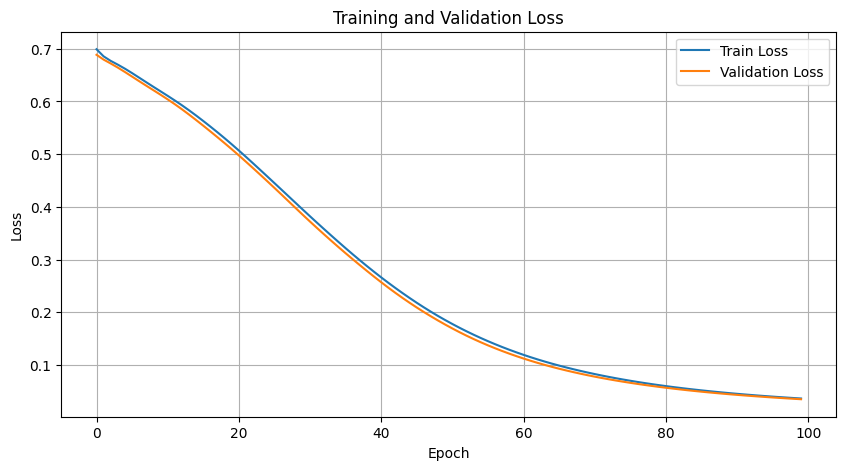

In [9]:
# Инициализация модели, функции потерь и оптимизатора
non_linear_model = NonLinearModel()
fn_loss = nn.BCELoss()
optimizer = optim.Adam(non_linear_model.parameters(), lr=0.01)

# Обучение модели
train_losses = []
val_losses = []
epochs = 100

for epoch in range(epochs):
    # Обучение
    non_linear_model.train()
    optimizer.zero_grad()
    train_predict = non_linear_model(X_train)
    train_loss = fn_loss(train_predict, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())
    
    # Валидация
    non_linear_model.eval()
    with torch.no_grad():
        val_predict = non_linear_model(X_test)
        val_loss = fn_loss(val_predict, y_test)
        val_losses.append(val_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Построение графиков
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

### Задание 1.3
Напишите функцию `plot_decision_boundary()` для визуализации границы, показывающей как модель разделяет классы в пространстве признаков.

Для этого внутри функции создается сетка (mershfrid) значений по осям X и Y, затем каждая точка этой сетки передается в модель и вычисляется для неё предсказание (класс), а затем всё пространство окрашивается цветом класса.
Пример, создания mershfrid:
```
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

```

Затем получите диаграммы предсказаний для каждой из обученной модели и сделайте выводы. Закрашивание областей сетки можно сделать, например, следующим образом (где `Z` - предсказанные классы):
```
ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.4)
```

В результате должны получиться примерно диаграммы как в файле `2025_NN_lab4.png` для линейной и нелинейной моделей соответственно.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Визуализация границы принятия решений модели
def plot_decision_boundary(ax, model, X, y, h=0.02, title='Decision Boundary'):
    # Параметры:
    # model - обученная модель PyTorch
    # X - тензор признаков (n_samples, 2)
    # y - тензор меток (n_samples,)
    # h - шаг сетки (опционально)
    # title - заголовок графика (опционально)
    
    # Определяем границы пространства признаков
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Создаем сетку точек
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Преобразуем сетку в тензор и делаем предсказания
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        Z = model(grid)
    Z = (Z > 0.5).float().numpy().reshape(xx.shape)  # Бинаризация: 0 или 1  # Преобразует вероятности в 0 или 1
    
    # Создаем график
    ax.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5], colors=['blue', 'red'], alpha=0.1) 
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", alpha=1.0)#c=y, cmap=plt.cm.RdBu, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

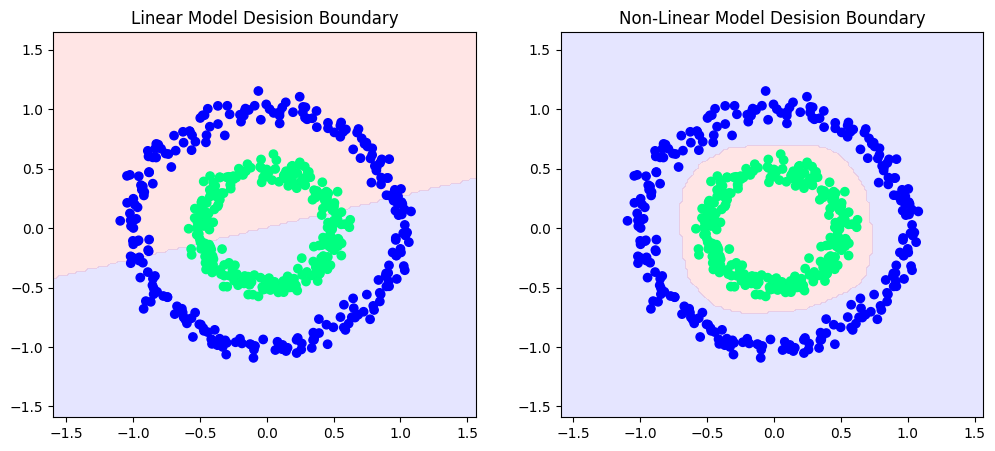

In [11]:
# Построение графиков для обученных моделей
# Создаем подграфики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Отрисовываем оба графика
plot_decision_boundary(ax1, model, X.numpy(), y.numpy().ravel(), title='Linear Model Desision Boundary')
plot_decision_boundary(ax2, non_linear_model, X.numpy(), y.numpy().ravel(), title='Non-Linear Model Desision Boundary')

plt.show()


### Задание 2
Используя известный датасет `Iris`, исследуйте эффект катастрофического забывания нейронной сети.

Для этого выполните:
1. Разбейте датасет на сбалансированные обучающую и валидационную подвыборки. Визуализируйте состав датасета относительно количества примеров в классах.
1. Создайте модель нейронной сети из трёх линейных слоёв и функций активации `nn.ReLu()`. Продумайте выход сети, чтобы для него подходила используемая вами функция потерь.
1. Обучите модель классификации на два из трёх классов: `setosa` и `versicolor`. Оцените точность классификации обученной модели.
1. Продолжите обучать модель классификации на два класса из трёх (но уже добавим новый класс): `versicolor` и `virginica`. Оцените точность дообученной модели.
1. Проверьте точность классификации дообученой модели на "старой" задаче из пункта 3. Сделайте выводы.

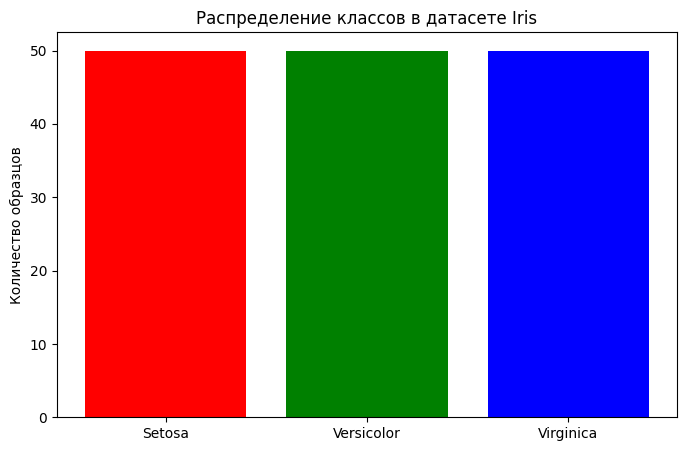

In [12]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target
#print(np.bincount(y)) # Количество значений каждого класса

# Визуализация распределения классов
plt.figure(figsize=(8, 5))
plt.bar(['Setosa', 'Versicolor', 'Virginica'], np.bincount(y), color=['red', 'green', 'blue'])
plt.title('Распределение классов в датасете Iris')
plt.ylabel('Количество образцов')
plt.show()

In [13]:
# Разделение на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Преобразование в тензоры PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)

In [14]:
# Описание модели
class IrisClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 64), # На входе четыре признака: длина и ширина чашелистика, длина и ширина лепестка. На выходе 64 нейрона
            nn.ReLU(), 
            #nn.Dropout(0.2),  # Можно отключать, например, 20% нейронов для борьбы с переобучением
            #nn.BatchNorm1d(64), # или использовать Batch Normalization для стабилизации обучения
            nn.Linear(64, 32), # Сжимает представление с 64 до 32 нейронов (для ускорения)
            nn.ReLU(),
            nn.Linear(32, 3)  # 3 выхода, т.к. 3 класса 
        )
    
    def forward(self, x): # Определяет, как данные проходят через сеть (последовательное прохождение слоев из nn.Sequential)
        return self.net(x)

model = IrisClassifier()
fn_loss = nn.CrossEntropyLoss() # Преобразует логиты (выход нейронной сети) в вероятности классов
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [15]:
# Обучение
def train_model(model, X_train, y_train, X_val, y_val, epochs=100):
    train_losses = []
    val_losses = []
    accuracies = []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        train_predict = model(X_train)
        train_loss = fn_loss(train_predict, y_train)
        train_loss.backward()
        optimizer.step()
        
        # Валидация
        model.eval()
        with torch.no_grad():
            val_predict = model(X_val)
            val_loss = fn_loss(val_predict, y_val)
            _, val_predict = torch.max(val_predict, 1)
            accuracy = (val_predict == y_val).float().mean()
        
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())
        accuracies.append(accuracy.item())
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Accuracy: {accuracy.item():.4f}')

    print(f"Предсказанные значения классов: {val_predict.numpy()}")
    print(f"Эталонные значения классов: \t{y_val.numpy()}")
    print(f"\nТочность на валидационных данных: {accuracy.item():.4f}")
    
    return train_losses, val_losses, accuracies

In [16]:
# Первое обучение: на классах Setosa и Versicolor
# Выбираем только классы Setosa (0) и Versicolor (1)
# Для обучающего набора
mask = (y_train == 0) | (y_train == 1)
X_train_training_1 = X_train[mask]
y_train_training_1 = y_train[mask]

# Для валидационного набора
mask_val = (y_val == 0) | (y_val == 1)
X_val_training_1 = X_val[mask_val]
y_val_training_1 = y_val[mask_val]

print("Обучение модели на классах Setosa и Versicolor:")
train_losses1, val_losses1, accuracies1 = train_model(model, X_train_training_1, y_train_training_1, X_val_training_1, y_val_training_1)
#print(f"\nТочность на Setosa и Versicolor до дообучения: {accuracy.item():.4f}")

Обучение модели на классах Setosa и Versicolor:
Epoch 10/100, Train Loss: 0.0707, Val Loss: 0.0540, Accuracy: 1.0000
Epoch 20/100, Train Loss: 0.0005, Val Loss: 0.0005, Accuracy: 1.0000
Epoch 30/100, Train Loss: 0.0001, Val Loss: 0.0001, Accuracy: 1.0000
Epoch 40/100, Train Loss: 0.0000, Val Loss: 0.0000, Accuracy: 1.0000
Epoch 50/100, Train Loss: 0.0000, Val Loss: 0.0000, Accuracy: 1.0000
Epoch 60/100, Train Loss: 0.0000, Val Loss: 0.0000, Accuracy: 1.0000
Epoch 70/100, Train Loss: 0.0000, Val Loss: 0.0000, Accuracy: 1.0000
Epoch 80/100, Train Loss: 0.0000, Val Loss: 0.0000, Accuracy: 1.0000
Epoch 90/100, Train Loss: 0.0000, Val Loss: 0.0000, Accuracy: 1.0000
Epoch 100/100, Train Loss: 0.0000, Val Loss: 0.0000, Accuracy: 1.0000
Предсказанные значения классов: [1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1]
Эталонные значения классов: 	[1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1]

Точность на валидационных данных: 1.0000


In [17]:
# Второе обучение: на классах Versicolor (1) и Virginica (2)
mask = (y_train == 1) | (y_train == 2)
X_train_training_2 = X_train[mask]
y_train_training_2 = y_train[mask]

# Для валидационного набора
mask_val = (y_val == 1) | (y_val == 2)
X_val_training_2 = X_val[mask_val]
y_val_training_2 = y_val[mask_val]

print("Дообучение модели на классах Versicolor и Virginica:")
train_losses2, val_losses2, accuracies2 = train_model(model, X_train_training_2, y_train_training_2, X_val_training_2, y_val_training_2)

Дообучение модели на классах Versicolor и Virginica:
Epoch 10/100, Train Loss: 1.0047, Val Loss: 0.8681, Accuracy: 0.5000
Epoch 20/100, Train Loss: 0.6963, Val Loss: 0.7285, Accuracy: 0.6667
Epoch 30/100, Train Loss: 0.3430, Val Loss: 0.5473, Accuracy: 0.7667
Epoch 40/100, Train Loss: 0.1728, Val Loss: 0.3684, Accuracy: 0.8667
Epoch 50/100, Train Loss: 0.0909, Val Loss: 0.2083, Accuracy: 0.8667
Epoch 60/100, Train Loss: 0.0475, Val Loss: 0.2805, Accuracy: 0.8667
Epoch 70/100, Train Loss: 0.0305, Val Loss: 0.3562, Accuracy: 0.8667
Epoch 80/100, Train Loss: 0.0215, Val Loss: 0.3794, Accuracy: 0.8667
Epoch 90/100, Train Loss: 0.0158, Val Loss: 0.3932, Accuracy: 0.8667
Epoch 100/100, Train Loss: 0.0120, Val Loss: 0.3880, Accuracy: 0.8667
Предсказанные значения классов: [2 1 1 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 1 2 2 1 1 2 1]
Эталонные значения классов: 	[2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2 2 1 2 1 1 2 2 1]

Точность на валидационных данных: 0.8667


In [18]:
# Проверка на "старой" задаче
# Проверяем точность на Setosa и Versicolor после дообучения
model.eval()
with torch.no_grad():
    predict = model(X_val_training_1)
    _, val_predict = torch.max(predict, 1)
    print(f"Предсказанные значения классов: {val_predict.numpy()}")
    print(f"Эталонные значения классов: \t{y_val_training_1.numpy()}")
    accuracy = (val_predict == y_val_training_1).float().mean()
    print(f"\nТочность на Setosa и Versicolor после дообучения: {accuracy.item():.4f}")

Предсказанные значения классов: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
Эталонные значения классов: 	[1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1]

Точность на Setosa и Versicolor после дообучения: 0.4667


In [19]:
# Проверка на валидационном наборе 
# Проверяем точность на Setosa и Versicolor после дообучения
model.eval()
with torch.no_grad():
    predict = model(X_val)
    _, val_predict = torch.max(predict, 1)
    accuracy = (val_predict == y_val).float().mean()
    print(f"Предсказанные значения классов: \n{val_predict.numpy()}")
    print(f"Эталонные значения классов: \n{y_val.numpy()}")
    print(f"\nТочность после дообучения: {accuracy.item():.4f}")

Предсказанные значения классов: 
[2 1 1 1 2 2 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 1
 1 1 2 1 1 1 2 1]
Эталонные значения классов: 
[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]

Точность после дообучения: 0.5778


### Вывод:
После дообучения на новых классах (Versicolor/Virginica) модель практически полностью забывает предыдущие знания о классах Setosa/Versicolor. Точность на "старой" задаче резко падает, т.к. модель перестает распознавать класс Setosa (0).